In [108]:
from io import BytesIO
import requests
import pandas as pd
import linearmodels

import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from scipy.stats import norm
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
import math as mth
from scipy.stats import pearsonr
from scipy.stats import spearmanr


from scipy.stats import f_oneway
from sklearn.feature_selection import f_regression
from linearmodels.panel import PanelOLS
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

import plotly.graph_objects as go
import scipy.stats as stats
import datetime as dt

from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

font_1 = {'family': 'sans-serif',
        'color':  '#000000',
        'weight': 'normal',
        'size': 20,
        }

font_2 = {'family': 'sans-serif',
        'color':  '#000000',
        'weight': 'normal',
        'size': 15,
          
        }

---

# Data preprocessing

In [109]:
spreadsheet_id = '1khUr-TV24VXP8kQoRfCk7D9_1mJhMuWyzhwJ_EWT1xc'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
population_growth = pd.read_csv(BytesIO(r.content))
# population_growth.info()

In [110]:
spreadsheet_id = '1z9YsYGM4UztrBo9i5kDb_jgfM-3ctnO8FRn4hWE2bc8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
migration = pd.read_csv(BytesIO(r.content))
# migration.info()

In [111]:
spreadsheet_id = '1-cHwRDRgd-70YmRs-RwImiaebbze8TDu_fVOuWwbgQo'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
cpi = pd.read_csv(BytesIO(r.content))
# cpi.info()

In [112]:
spreadsheet_id = '1lYwWgJd4DtVCSThBz7wiH5xYt-p2arn1Z-r2iZvRb34'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
gni_and_gdp = pd.read_csv(BytesIO(r.content))
# gni_and_gdp.info()

In [113]:
spreadsheet_id = '1yfqg_YUA5qeU5f8g1aK31YvfjR3Z4dBAoUBYxUmirEI'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
hdi = pd.read_csv(BytesIO(r.content))
# hdi.info()

In [114]:
spreadsheet_id = '1WYjtSbTfzBYdYbaOpVtpg0-e_IEhC6HvAeXnAbkLGto'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
labour_force = pd.read_csv(BytesIO(r.content))
# labour_force.info()

---

### Merging all tables

In [115]:
migration_long = pd.melt(migration, id_vars=["year"], var_name="Region", value_name="migration")
population_growth_long = pd.melt(population_growth, id_vars=["year"], var_name="Region", value_name="population_growth")
cpi_long = pd.melt(cpi, id_vars=["year"], var_name="Region", value_name="cpi")
gni_and_gdp_long = pd.melt(gni_and_gdp, id_vars=["year"], var_name="Region", value_name="gni_and_gdp")
hdi_long = pd.melt(hdi, id_vars=["year"], var_name="Region", value_name="hdi")
labour_force_long = pd.melt(labour_force, id_vars=["year"], var_name="Region", value_name="labour_force")

In [116]:
# Merge all of the long-format tables into a single DataFrame
merged = migration_long.merge(
    population_growth_long, on=["year", "Region"]).merge(
    cpi_long, on=["year", "Region"]).merge(
    gni_and_gdp_long, on=["year", "Region"]).merge(
    hdi_long, on=["year", "Region"]).merge(
    labour_force_long, on=["year", "Region"])

merged.head()

,year,Region,migration,population_growth,cpi,gni_and_gdp,hdi,labour_force
0,2010,akm,-5581.0,3728.0,100.083651,1406718.30,0.798,86.0
1,2011,akm,-5706.0,3824.0,100.105166,1412013.59,0.806,85.7
2,2012,akm,-3429.0,4799.0,100.138169,1419619.73,0.814,86.9
3,2013,akm,-1975.0,4819.0,100.172401,1422898.11,0.823,87.2
4,2014,akm,-4352.0,5300.0,100.183447,1422961.74,0.829,88.8


---

# Analysis

1. Explore the data: Use Pandas functions like head(), describe(), and info() to get a basic understanding of the structure, distribution, and missing values of your data. Also using visualization tools like Plotly to create plots and histograms to visualize the distributions of your variables.


2. Correlation analysis: Calculate the correlation coefficients between migration and each of the other economic variables using the corr() function in Pandas. This gives an idea of the strength and direction of the relationships between migration and the other variables. Also create scatterplots to visualize these relationships.


3. Regression analysis: Use regression analysis to model the relationship between migration and the other economic variables, while controlling for other factors that may influence migration (such as regional differences, time trends, or other economic or social factors). Using tools like the statsmodels package in Python to perform multiple regression analysis and examine the significance and magnitude of the effects of each independent variable.


4. Interpret the results: After performing regression analysis, we move to interpreting the results to draw conclusions about the relationships between migration and the other economic variables. Also using the regression model to make predictions about how migration may change in response to changes in the economic variables.

---

## 1. Explore the data

### General info about our final table: 

In [117]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               168 non-null    int64  
 1   Region             168 non-null    object 
 2   migration          168 non-null    float64
 3   population_growth  168 non-null    float64
 4   cpi                168 non-null    float64
 5   gni_and_gdp        168 non-null    float64
 6   hdi                168 non-null    float64
 7   labour_force       168 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 11.8+ KB


In [118]:
merged.describe()

,year,migration,population_growth,cpi,gni_and_gdp,hdi,labour_force
count,168.000000,168.000000,168.000000,168.000000,1.680000e+02,168.000000,168.000000
mean,2015.500000,-2120.970238,11957.505952,100.261630,2.744583e+06,0.800310,83.126190
std,3.462373,9756.844056,8904.824314,0.273172,1.444689e+06,0.022471,3.701889
min,2010.000000,-20135.000000,-1932.000000,99.548564,1.033999e+06,0.747000,71.900000
25%,2012.750000,-6400.250000,5142.500000,100.089909,1.459856e+06,0.789000,80.500000
50%,2015.500000,-3228.000000,11073.500000,100.259797,2.436203e+06,0.798000,83.250000
75%,2018.250000,-581.750000,15935.250000,100.441382,3.105414e+06,0.812000,86.200000
max,2021.000000,40742.000000,38218.000000,100.906987,6.031893e+06,0.849000,91.200000


### Example of visualisation for migration variable:

In [119]:
fig = go.Figure()

for region in merged['Region'].unique():
    data = merged[merged['Region'] == region]
    fig.add_trace(go.Scatter(x=data['year'], y=data['migration'], mode='lines', name=region))

fig.update_layout(title='Migration by Region and Year',
                  xaxis_title='Year',
                  yaxis_title='Migration')

fig.show()

## 2. Correlation analysis

In [120]:
corr_matrix = merged.corr()
display(corr_matrix)

,year,migration,population_growth,cpi,gni_and_gdp,hdi,labour_force
year,1.000000,-0.102507,0.047734,0.641040,0.012032,0.610947,0.217800
migration,-0.102507,1.000000,0.188372,-0.452017,-0.106719,0.120131,-0.313182
population_growth,0.047734,0.188372,1.000000,-0.158754,-0.274862,-0.053735,-0.296764
cpi,0.641040,-0.452017,-0.158754,1.000000,0.014456,0.240638,0.353020
gni_and_gdp,0.012032,-0.106719,-0.274862,0.014456,1.000000,-0.014216,0.300251
hdi,0.610947,0.120131,-0.053735,0.240638,-0.014216,1.000000,0.224949
labour_force,0.217800,-0.313182,-0.296764,0.353020,0.300251,0.224949,1.000000


### Correlation matrix

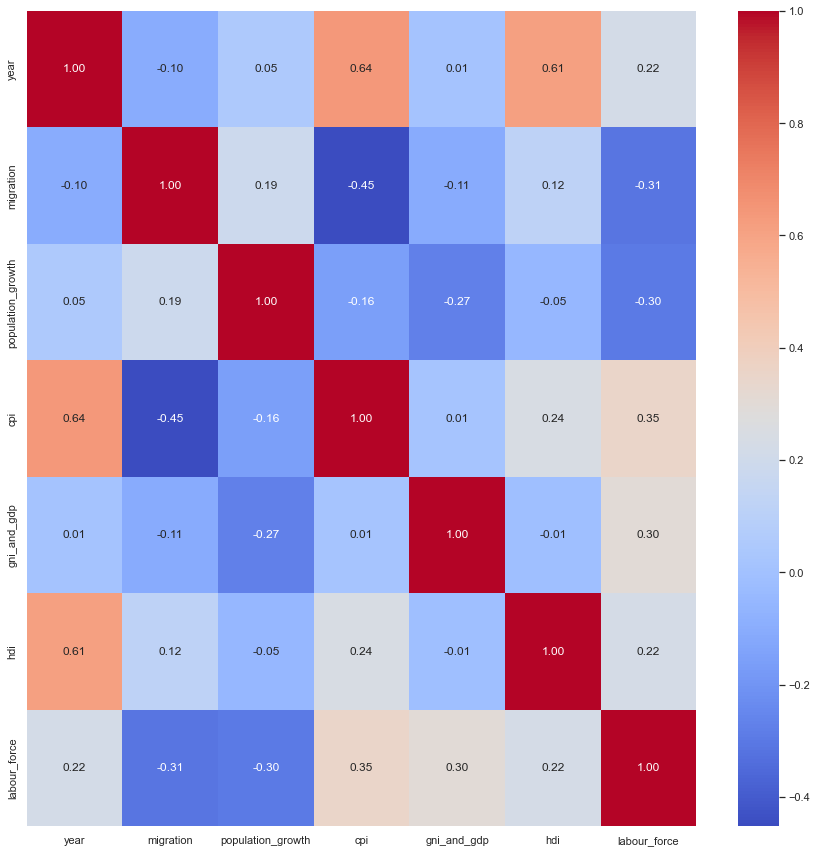

In [121]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

### Scatterplot

#### (example for migration and CPI)

In [122]:
fig = px.scatter(merged, x='cpi', y='migration', trendline='ols', hover_name='Region', color='Region')

fig.update_layout(title='Migration vs. CPI',
                  xaxis_title='CPI',
                  yaxis_title='Migration')

fig.show()

---

## 3. Regression analysis

In [123]:
# Define the dependent variable (migration) and independent variable (CPI)
y = merged['migration']
X = merged[['population_growth','cpi','gni_and_gdp','hdi','labour_force']]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              migration   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     14.32
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.32e-11
Time:                        14:48:07   Log-Likelihood:                -1750.3
No. Observations:                 168   AIC:                             3513.
Df Residuals:                     162   BIC:                             3531.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.513e+06   2.49e+0

This is an OLS (Ordinary Least Squares) regression analysis with migration as the dependent variable and population_growth, cpi, gni_and_gdp, hdi, and labour_force as independent variables.

- The R-squared value of 0.307 suggests that the model explains 30.7% of the variation in the migration variable. This value indicates that the model has a moderate fit to the data.


- The coefficients of the independent variables show the direction and magnitude of the relationships between them and the dependent variable. The constant term is 1.513e+06, which is the estimated value of the dependent variable when all the independent variables are equal to zero.


- The coefficient for population_growth is 0.0777, but its p-value (0.314) suggests that this variable is not statistically significant in the model.


- The coefficient for cpi is -1.564e+04, which suggests that as the cpi variable decreases, the migration variable increases. The p-value for cpi is 0.000, indicating that the variable is statistically significant in the model.


- The coefficient for gni_and_gdp is -0.0001, but its p-value (0.788) suggests that this variable is not statistically significant in the model.


- The coefficient for hdi is 1.183e+05, which suggests that as the hdi variable increases, the migration variable increases. The p-value for hdi is 0.000, indicating that the variable is statistically significant in the model.


- The coefficient for labour_force is -509.0275, which suggests that as the labour_force variable decreases, the migration variable increases. The p-value for labour_force is 0.012, indicating that the variable is statistically significant in the model.


- The F-statistic of 14.32 with a corresponding p-value of 1.32e-11 indicates that at least one independent variable in the model is significant.


- The Omnibus test and Jarque-Bera test suggest that the errors in the model are not normally distributed, and the Durbin-Watson test shows that there is a possibility of positive autocorrelation in the model's residuals.


Overall, the regression analysis suggests that cpi, hdi, and labour_force have a significant relationship with migration. However, the relatively low R-squared value and the issues with the model's residuals indicate that there may be other factors affecting the migration variable that are not accounted for in this model.

### F-test

In [124]:
y = merged['migration']
X = merged[['population_growth','cpi','gni_and_gdp','hdi','labour_force']]

f_scores, p_values = f_regression(X, y)

display('F-scores:', f_scores)
display('p-values:', p_values)

'F-scores:'

array([ 6.10704891, 42.62631683,  1.91234205,  2.43068787, 18.05244534])

'p-values:'

array([1.44738431e-02, 7.72443770e-10, 1.68560677e-01, 1.20885129e-01,
       3.57326543e-05])

Looking at the output, we can see that 'population_growth', 'cpi', 'hdi', and 'labour_force' have p-values less than 0.05, indicating that they have statistically significant relationships with the dependent variable, 'migration'. The F-scores also suggest that these variables are relatively important in explaining the variation in 'migration', with 'cpi' having the highest F-score.

On the other hand, 'gni_and_gdp' has a p-value greater than 0.05, indicating that there is no statistically significant relationship between this variable and 'migration'. The low F-score for this variable also suggests that it may not be very important in explaining the variation in 'migration'.

### Breusch-Pagan

If you're concerned about heteroskedasticity in your regression analysis and the White test is not applicable due to the issue with degrees of freedom, one alternative test you could consider is the Breusch-Pagan test. The Breusch-Pagan test is similar to the White test in that it tests for heteroskedasticity in the residuals of a regression model, but it is more robust to small sample sizes.

In [125]:
y = merged['migration']
X = merged[['population_growth','cpi','gni_and_gdp','hdi','labour_force']]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

bp_test = het_breuschpagan(model.resid, X)
print("Breusch-Pagan test statistic:", bp_test[0])
print("Breusch-Pagan p-value:", bp_test[1])

Breusch-Pagan test statistic: 28.68704165652151
Breusch-Pagan p-value: 2.670650453836909e-05


The Breusch-Pagan test is a statistical test used to detect heteroscedasticity in a regression model. Heteroscedasticity occurs when the variance of the errors in a regression model is not constant across all observations, which violates one of the assumptions of a linear regression model.

The test statistic in this case is 28.687 and the p-value is 2.67e-05. The p-value is less than the conventional significance level of 0.05, indicating that there is strong evidence of heteroscedasticity in the regression model. Therefore, the assumption of constant variance of errors across observations is violated and the results of the regression model should be interpreted with caution.

### Other tests:

There are several statistical tests that can be useful for analyzing the relationship between the variables in your project. Here are a few examples:

1. Pearson correlation coefficient: This test measures the linear relationship between two continuous variables, such as the correlation between population growth and migration.


2. Spearman correlation coefficient: This test measures the monotonic relationship between two continuous or ordinal variables. It can be useful when the relationship between the variables is non-linear or the data is skewed.


3. ANOVA (Analysis of Variance): This test is used to compare the means of two or more groups. It can be useful for analyzing differences in economic variables across regions.

#### 1. Pearson correlation coefficient

In [126]:
variables = ['population_growth', 'cpi', 'gni_and_gdp', 'hdi', 'labour_force']

for var in variables:
    x = merged[var]
    y = merged['migration']
    corr_coef, p_value = pearsonr(x, y)
    print(f"{var} - Pearson correlation coefficient: {corr_coef:.5f}, p-value: {p_value:.5f}")


population_growth - Pearson correlation coefficient: 0.18837, p-value: 0.01447
cpi - Pearson correlation coefficient: -0.45202, p-value: 0.00000
gni_and_gdp - Pearson correlation coefficient: -0.10672, p-value: 0.16856
hdi - Pearson correlation coefficient: 0.12013, p-value: 0.12089
labour_force - Pearson correlation coefficient: -0.31318, p-value: 0.00004


Based on the Pearson correlation coefficient and p-values, we can make the following interpretations:

- Population_growth has a positive correlation with migration (coefficient=0.18837, p-value=0.01447). This means that regions with a higher population growth tend to have higher levels of migration.


- CPI has a negative correlation with migration (coefficient=-0.45202, p-value=0.00000). This means that regions with higher levels of consumer price inflation tend to have lower levels of migration.


- GNI_and_GDP has a weak negative correlation with migration (coefficient=-0.10672, p-value=0.16856). However, since the p-value is greater than 0.05, we cannot conclude that there is a statistically significant relationship between these two variables.


- HDI has a weak positive correlation with migration (coefficient=0.12013, p-value=0.12089). However, since the p-value is greater than 0.05, we cannot conclude that there is a statistically significant relationship between these two variables.


- Labour_force has a negative correlation with migration (coefficient=-0.31318, p-value=0.00004). This means that regions with higher levels of labour force tend to have lower levels of migration.

#### 2. Spearman correlation coefficient

In [127]:
for column in merged.columns:
    coef, pval = spearmanr(merged[column], merged['migration'])
    print(f"{column} - Spearman correlation coefficient: {coef:.5f}, p-value: {pval:.5f}")


year - Spearman correlation coefficient: -0.24970, p-value: 0.00110
Region - Spearman correlation coefficient: -0.03069, p-value: 0.69290
migration - Spearman correlation coefficient: 1.00000, p-value: 0.00000
population_growth - Spearman correlation coefficient: 0.23809, p-value: 0.00189
cpi - Spearman correlation coefficient: -0.45012, p-value: 0.00000
gni_and_gdp - Spearman correlation coefficient: 0.08442, p-value: 0.27661
hdi - Spearman correlation coefficient: 0.00748, p-value: 0.92332
labour_force - Spearman correlation coefficient: -0.29855, p-value: 0.00008


The Spearman correlation coefficient is a nonparametric test that assesses the strength and direction of association between two ranked variables. In this case, the results show:

- Year: There is a negative correlation between the year and migration, suggesting that migration has decreased over the years.


- Region: There is a weak negative correlation between region and migration, which means that there is no significant association between these two variables.


- Migration: There is a strong positive correlation between migration and itself (as expected) with a p-value of 0. This indicates that there is a perfect correlation between migration in different regions and years.


- Population_growth: There is a moderate positive correlation between population growth and migration, implying that regions with higher population growth also have higher migration.


- CPI: There is a strong negative correlation between CPI and migration, indicating that migration decreases as CPI increases.


- GNI_and_GDP: There is no significant correlation between GNI_and_GDP and migration.


- HDI: There is no significant correlation between HDI and migration.


- Labour_force: There is a moderate negative correlation between labour force and migration, indicating that regions with a higher labour force have lower migration.

#### 3. ANOVA

- The null hypothesis for the one-way ANOVA test is that there is no significant difference in the means of the variable across the groups.
- The alternative hypothesis is that there is at least one group with a significantly different mean.

In [128]:
grouped = merged.groupby('Region')

variables = ['cpi', 'gni_and_gdp', 'hdi', 'labour_force']
for variable in variables:
    data = [group[1][variable].values for group in grouped]
    f_value, p_value = f_oneway(*data)
    print(f"{variable} ANOVA Results:\nF-Value: {f_value:.4f}\nP-Value: {p_value:.5f}\n")

cpi ANOVA Results:
F-Value: 15.1425
P-Value: 0.00000

gni_and_gdp ANOVA Results:
F-Value: 76338.6511
P-Value: 0.00000

hdi ANOVA Results:
F-Value: 13.5216
P-Value: 0.00000

labour_force ANOVA Results:
F-Value: 27.1706
P-Value: 0.00000



The ANOVA results indicate that there are significant differences in the mean values of the economic variables (cpi, gni_and_gdp, hdi, and labour_force) across regions. Specifically, for each variable, the F-value is significantly different from 1 (indicating the existence of significant variation in the means of the groups), and the p-value is less than 0.05 (indicating that the observed differences are unlikely to be due to chance). Therefore, we can conclude that there are significant differences in these economic variables across the different regions.